<h1>Auto regression model</h1>

In [1]:
from __future__ import print_function
import os
import sys
import numpy
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt

<h2>функция, которая выводит информацию о данных и подготавливает данные</h2>

In [18]:
def input_data():
    df = pandas.read_csv('/home/deka/Desktop/ML/auto_regression_model/sinos.csv') # sinusoid data to auto regression model
    df.drop('date',axis=1,inplace=True) # drop column 'date'
    # Graphic
    plt.rcParams['figure.figsize'] = (25, 15)
    plt.plot(df.values[:,-1], 'red');
    plt.title("Sin Value trend");
    plt.show()
    divide = int(len(df)*0.8) # value for divide data on train (80%) and test (20%)
    df.dropna(inplace=True) # drop NaN values from our data
    print(df)
    print(df.head(10),"\n") # print first 10 raws
    print(df.info(),"\n") # print info about dataframe
    print(df.shape,"\n") # print dataframe shape
    print(df.describe(),"\n") # print info about values
    train_X = numpy.array(df.values[:divide,:]) # train data with 80% of all data
    test_X = numpy.array(df.values[divide:,:]) # test data with 20% of all data
    x = numpy.array(df.values[:,:]) # all data

    return x, train_X, test_X # return all data

<h2>Информация о данных и вывод графиков</h2>

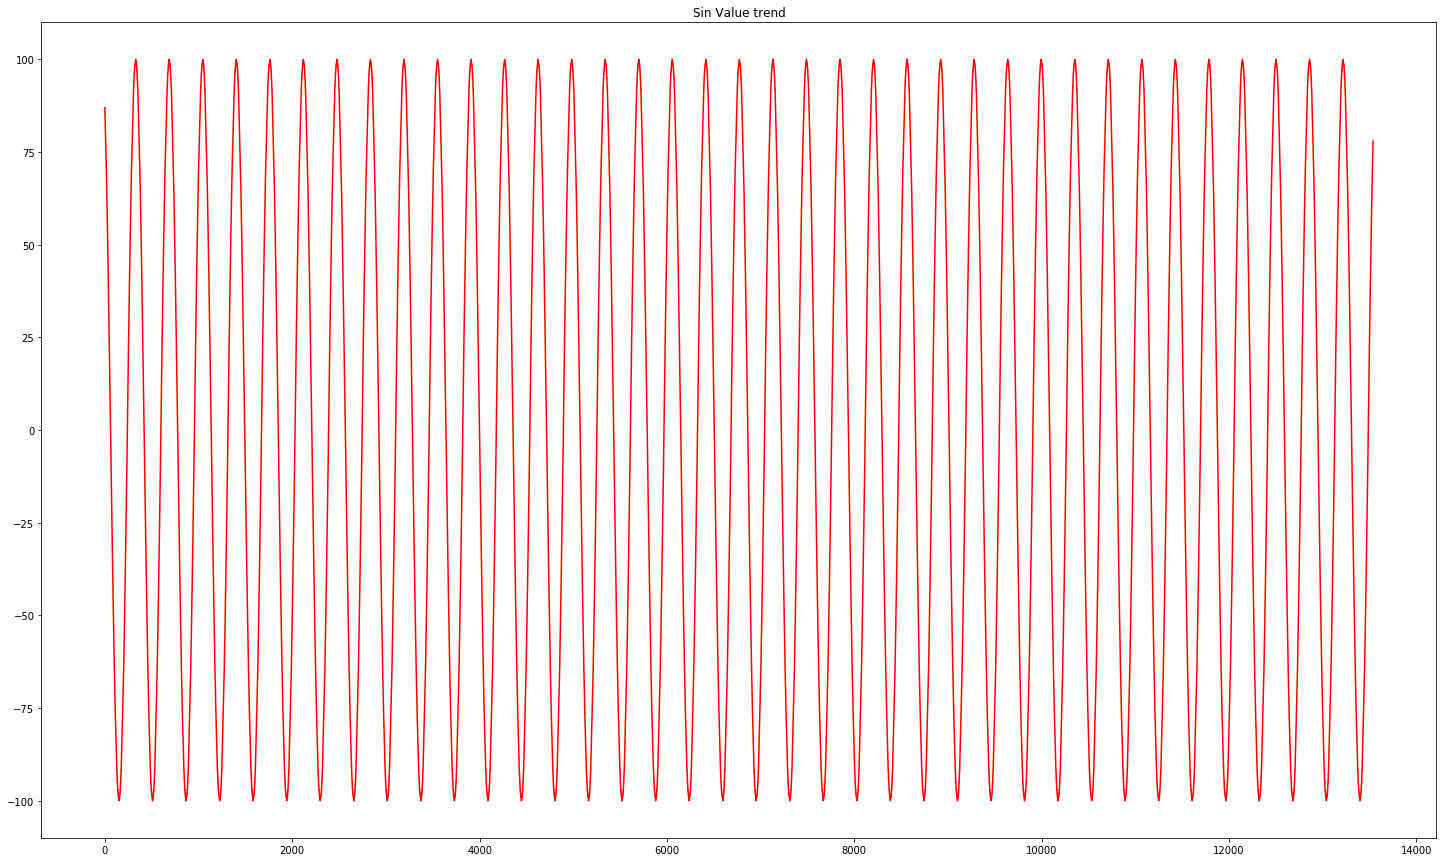

       Thread-Gen-1.sinusoid
0                         87
1                         86
2                         85
3                         84
4                         83
5                         82
6                         81
7                         80
8                         79
9                         78
10                        77
11                        76
12                        75
13                        74
14                        73
15                        71
16                        70
17                        69
18                        68
19                        66
20                        65
21                        64
22                        62
23                        61
24                        60
25                        58
26                        57
27                        55
28                        54
29                        52
...                      ...
13508                     39
13509                     40
13510         

In [19]:
# Hyperparameters
learning_rate = 1e-2 # learning speed of model
display_step = 1 # printing steps in learning cycle
batch_size = 30 # batch to feed model
hidden_layer_1 = 1 # one layer to construct model
global_step = 100 # all learning steps
x, train_x,test_x = input_data()    # take data from function input_data() and printing graphics
train_X = numpy.asarray(train_x)    # convert in numpy.asarray
test_X = numpy.asarray(test_x)      # convert in numpy.asarray
train_Y = numpy.asarray(train_X)    # convert in numpy.asarray
n_samples = train_X.shape[1]        # num inputs

<h2>Построения модели</h2>

In [20]:
# Interactive session
sess = tf.InteractiveSession()
# tensorflow Graph Input
X = tf.placeholder(dtype='float32',shape=(None,n_samples),name="first_placeholder")
Y = tf.placeholder(dtype='float32',shape=(None,1),name="second_placeholder")
# Set model weights
W = tf.Variable(tf.random_normal((n_samples,hidden_layer_1),stddev=0.01,dtype='float32'),name="weights")
b = tf.Variable(tf.zeros((1,hidden_layer_1),dtype='float32'),name="biases")
# Construct Model
prediction = tf.add(tf.matmul(X,W),tf.reduce_sum(b*W)) # function to get prediction 
# AdamOptimizer
# Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
loss = tf.reduce_sum(tf.square(prediction-Y)) # loss function printing mean squared errors
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) # optimizer to optimize weights
iteration = int(len(train_X)/batch_size) # epoch
# Initializer all variables
init = tf.global_variables_initializer()
sess.run(tf.global_variables_initializer())

/home/deka/anaconda3/envs/deka/lib/python3.5/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


<h2>Обучение модели</h2>

In [21]:
for step in range(global_step-1):
    for epoch in range(iteration):
        batch_x1 = train_X[epoch:batch_size+epoch,:]
        batch_y1 = train_Y[epoch+1:batch_size+epoch+1,:]
        sess.run(optimizer, feed_dict={X: batch_x1, Y: batch_y1})
        if (epoch+1) % display_step == 0:
                cosst = sess.run(loss, feed_dict={X: batch_x1, Y:batch_y1}) # show information about cost, weights, bias every step
    training_cost = sess.run(loss, feed_dict={X: batch_x1, Y: batch_y1})
    print("Epoch=", step,"Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch= 0 Training cost= 10.905045 W= [[0.9941346]] b= [[-0.43357897]] 

Epoch= 1 Training cost= 10.53204 W= [[0.9908921]] b= [[-0.24958645]] 

Epoch= 2 Training cost= 9.796284 W= [[0.9876602]] b= [[-0.09379892]] 

Epoch= 3 Training cost= 9.679915 W= [[0.98540074]] b= [[0.0287409]] 

Epoch= 4 Training cost= 9.781304 W= [[0.9838834]] b= [[0.1198312]] 

Epoch= 5 Training cost= 9.57609 W= [[0.9823958]] b= [[0.18356363]] 

Epoch= 6 Training cost= 9.532661 W= [[0.9814273]] b= [[0.22809932]] 

Epoch= 7 Training cost= 9.558268 W= [[0.9808392]] b= [[0.25851893]] 

Epoch= 8 Training cost= 9.433367 W= [[0.9800813]] b= [[0.27814224]] 

Epoch= 9 Training cost= 9.441643 W= [[0.97977227]] b= [[0.29138207]] 

Epoch= 10 Training cost= 9.394808 W= [[0.9793639]] b= [[0.29924065]] 

Epoch= 11 Training cost= 9.363913 W= [[0.9789969]] b= [[0.30420032]] 

Epoch= 12 Training cost= 9.356835 W= [[0.978757]] b= [[0.30722424]] 

Epoch= 13 Training cost= 9.357571 W= [[0.9785213]] b= [[0.30926123]] 

Epoch= 14 Trai

<h2>Тестирование модели</h2>

Prediction:
 [[-46.575207]
 [-48.530174]
 [-49.50766 ]
 ...
 [ 74.6327  ]
 [ 75.61018 ]
 [ 76.58766 ]] 
Real data:
 [[-48]
 [-50]
 [-51]
 ...
 [ 76]
 [ 77]
 [ 78]]


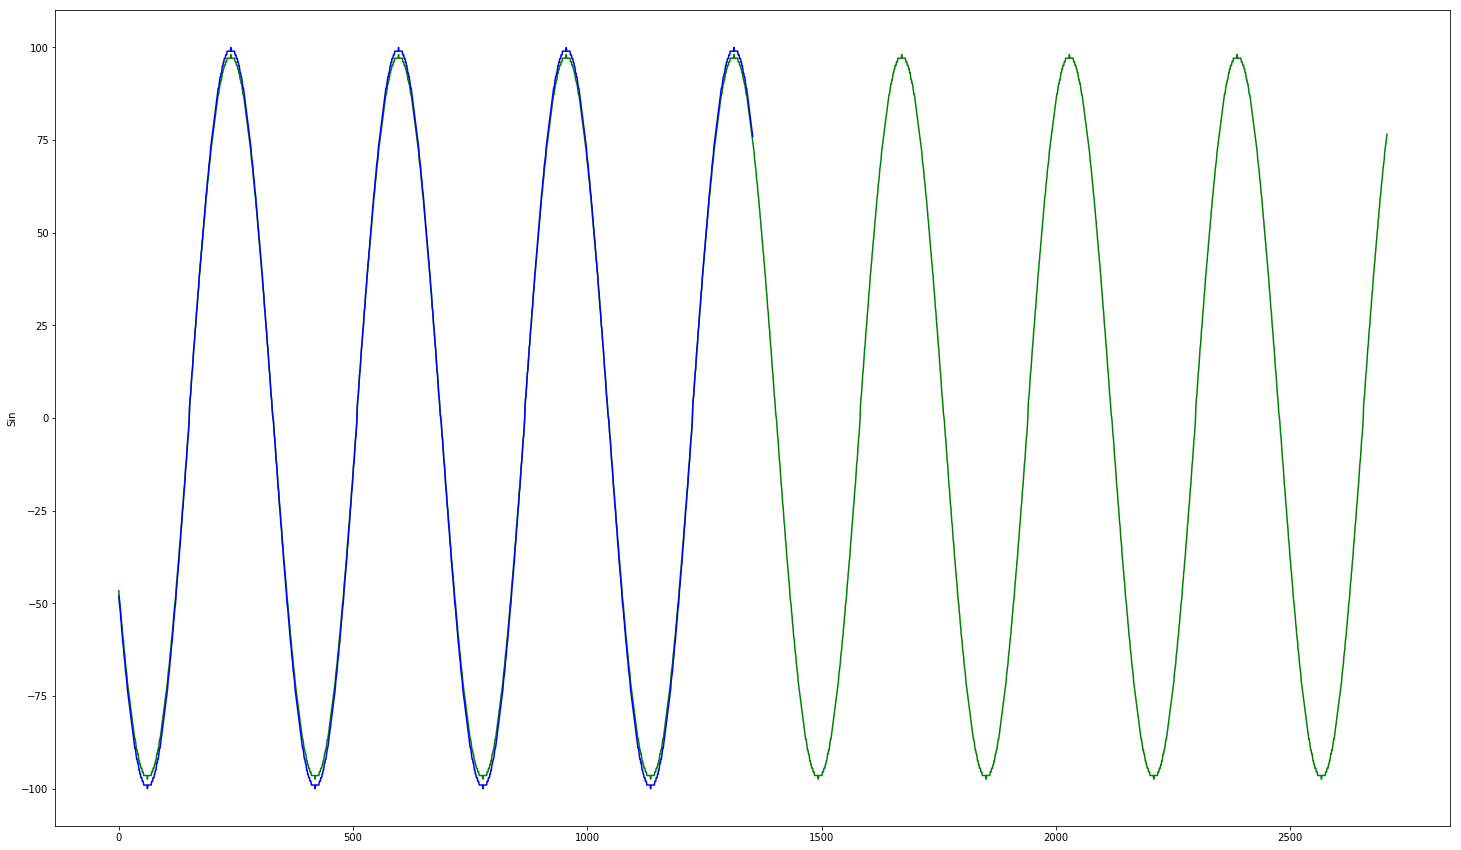

In [22]:
# Test our model
predict_test = sess.run(prediction, feed_dict={X: test_X}) # take prediction from test data
test_real = test_X[:int((len(test_X)*0.5))] # we take 50% of all test_data to check model
print("Prediction:\n",predict_test,"\nReal data:\n",test_X) # printing prediction and real data
plt.rcParams['figure.figsize'] = (25, 15)
plt.plot(predict_test,color='green') # Predicted line, green line
plt.ylabel('Sin')
plt.plot(test_real,color='blue') # Test line, blue line
plt.show()